<a href="https://colab.research.google.com/github/surajkumar089/Online_Retail_Customer_Segmentation--Unsupervised-Machine-Learning-Capstone_Project/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. <b><u>

## <b>**Problem Description**<b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## **Data Description**

* ### **InvoiceNo:** Invoice number. Nominal, a six-digit integral number assigned to each transaction specifically. This code denotes a cancellation if it begins with the letter "c.".
* ### **StockCode:** Product (item) code. A 5-digit integral number known as the nominal is assigned to each unique product.
* ### **Description:** Name of the Product (Item). Nominal.
* ### **Quantity:** The number of each item (product) in each transaction. Numeric.
* ### **InvoiceDate:** Invoice Time and date. The day and time that each transaction was created, represented by a number.
* ### **UnitPrice:** Unit pricing. Numeric, Sterling unit price for the product.
* ### **CustomerID:** Customer number. Nominal, a five-digit integral number assigned to every customer uniquely.
* ### **Country:** Country name. Nominal, the name of the country in which each customer resides.


# **Business Objective:**

### Customer segmentation is the practice of grouping the consumers of a firm into categories that represent the similarities among the customers in each category. In order to optimize each customer's value to the company, it is important to segment customers in order to determine how to interact with them.

### Customer segmentation may enable marketers to reach out to each customer in the most efficient manner. A customer segmentation analysis enables marketers to accurately identify distinct groups of customers based on demographic, behavioral, and other factors by utilizing the vast amount of customer (and potential customer) data accessible.

# **Importing Libraries**

In [ ]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from datetime import datetime
import datetime as dt
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

import seaborn as sns; sns.set()
from prettytable import PrettyTable
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Dataset**

In [ ]:
Retail_Data = pd.read_csv('/content/drive/MyDrive/Online_Retail_Customer_Segmentation/Online Retail.csv')

# **Getting the information of the Dataset**

In [ ]:
# Information about different columns of the Dataset:
Retail_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Shape of the Dataset:
Retail_Data.shape

(541909, 8)

Shape of our dataset is (541909, 8) that means we have 541909 number of rows and 8 columns

In [ ]:
# View first 10 rows of the dataset:
Retail_Data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


In [ ]:
# View Last 10 rows of the dataset:
Retail_Data.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/11 12:50,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/11 12:50,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/11 12:50,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,12/9/11 12:50,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/11 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
# Check the unique values
Retail_Data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [ ]:
# Information about the descriptions of the data set:
Retail_Data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# **Data Preprocessing**

## <b> Handling Null Values <b>

In [ ]:
# Getting the information about the null value.
Retail_Data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Here, There are some null values present in **Description** and **CustomerID** column includes exactly 1454 and 135080 null values

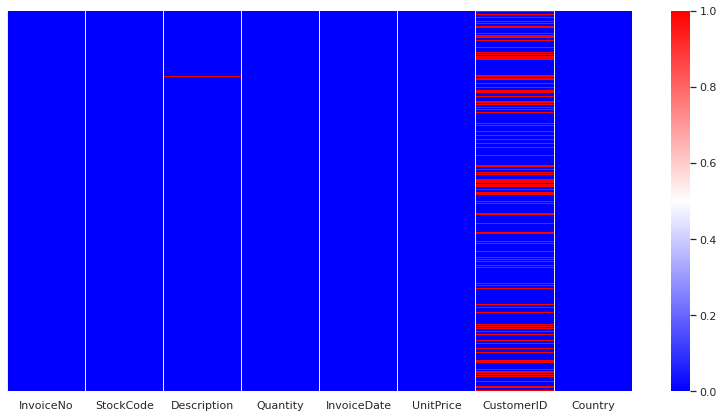

In [ ]:
#plotting graph
plt.figure(figsize=(14,7))
sns.heatmap(Retail_Data.isnull(), cmap='bwr', yticklabels=False)

Here, shining red lines indicate null values.

In [ ]:
# Drop the null values in Description and CustomerID field:
Retail_Data.dropna(inplace=True)

In [ ]:
# Information about the dataset after drop the null values:
Retail_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


After removing all the null values the observation in our dataset redces to (406829, 8).

## <b>Remove Duplicate Values<b>

In [ ]:
# Find the duplicate values in our dataset:
Retail_Data[Retail_Data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/10 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/10 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/10 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/10 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/11 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/11 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/11 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/11 11:34,2.10,14446.0,United Kingdom


We observe, there are (5225,8) duplicate values in our Dataset.

In [ ]:
# Now, drop the duplicate values from the dataset:
Retail_Data.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


After removing the duplicate values the shape of the dataset changes to(401604, 8)

 <b>The "InvoiceNo" feature contains information beginning with C that denotes a transaction cancellation. So, we will just remove that feature.<b>

In [ ]:
# checking the InviceNo that starts with c
Retail_Data['InvoiceNo'] = Retail_Data['InvoiceNo'].astype('str')

In [ ]:
Retail_Data = Retail_Data[~Retail_Data['InvoiceNo'].str.contains('C')]
Retail_Data.shape

(397924, 8)

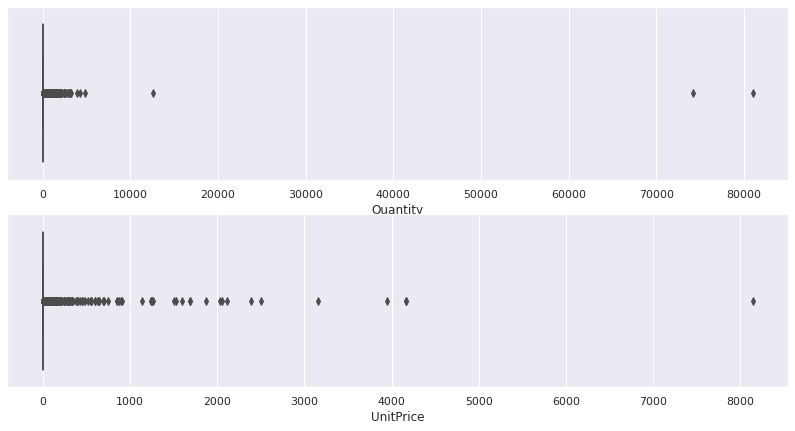

In [ ]:
#Plotting graph Quantity & UnitPrice:
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
sns.boxplot(Retail_Data['Quantity'])
plt.subplot(2,1,2)
sns.boxplot(Retail_Data['UnitPrice'])

<br>

# **Exploratory Data Analysis(EDA)**

##<b> Description <b>

In [ ]:
# Create a variable and check the description variable
Description_data = Retail_Data['Description'].value_counts().reset_index()
Description_data.rename(columns = {'index' : 'Description_Name'}, inplace = True)
Description_data.rename(columns = {'Description' : 'Count'}, inplace = True)
Description_data.head(5)

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


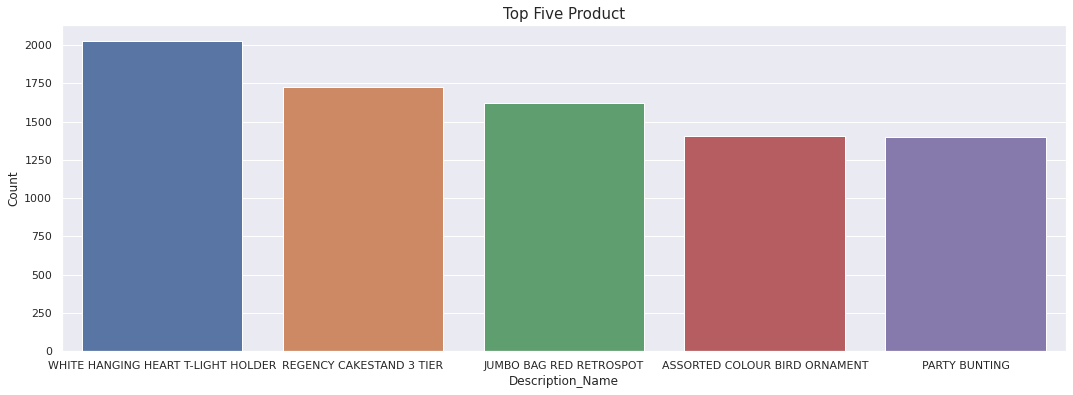

In [ ]:
# Plotting top 5 product:
plt.figure(figsize=(18,6))
plt.title('Top Five Product', fontsize=15)
sns.barplot(x='Description_Name', y='Count', data = Description_data.head(5))

**Top 5 product  based on maximum selling  are :**

* WHITE HANGING HEART T-LIGHT HOLDER,
* REGENCY CAKESTAND 3 TIER
* JUMBO BAG RED RETROSPOT
* PARTY BUNTING
* LUNCH BAG RED RETROSPOT

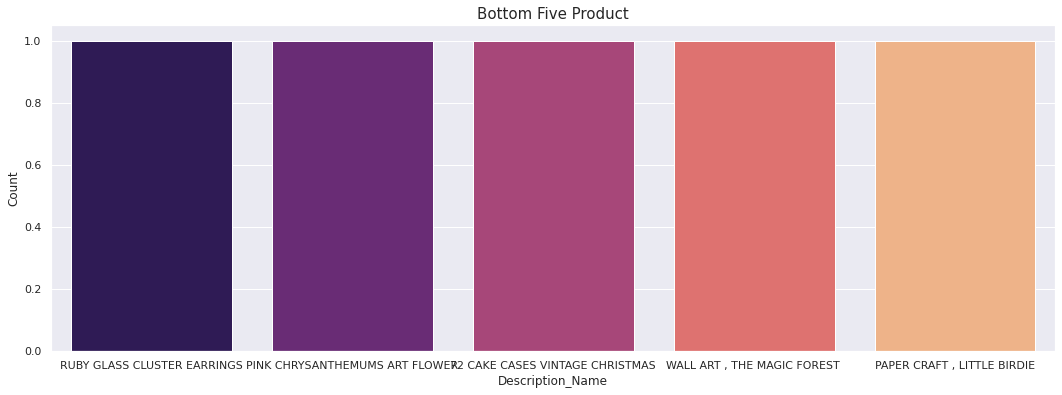

In [ ]:
# Plotting bottom 5 product:
plt.figure(figsize=(18,6))
plt.title('Bottom Five Product', fontsize=15)
sns.barplot(data = Description_data[-5:], x='Description_Name', y='Count',palette ='magma')

**Bottom 5 Product based on the selling are:**

* RUBY GLASS CLUSTER EARRINGS
* PINK CHRYSANTHEMUMS ART FLOWER
* 72 CAKE CASES VINTAGE CHRISTMAS
* WALL ART , THE MAGIC FOREST
* PAPER CRAFT , LITTLE BIRDIE

In [ ]:
# Create a new column with the Total_Price paid by the customer:
Retail_Data['Total_Price'] = Retail_Data['Quantity']*Retail_Data['UnitPrice']
Retail_Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Top most Quantity and total price paid by the customer:
max_price=Retail_Data['Total_Price'].value_counts().reset_index().rename(columns = {'index':'Quantity'})
max_price=max_price.sort_values(by='Total_Price',ascending=False).head(20)
print(max_price)

    Quantity  Total_Price
0      15.00        20082
1      17.70         9174
2      16.50         8490
3      10.20         8028
4      19.80         7625
5       1.25         7552
6       3.75         6847
7       1.65         5751
8      10.50         5550
9      20.80         5524
10      2.95         5427
11      5.04         5284
12      2.50         5242
13     30.00         5226
14      7.50         5163
15      8.50         4953
16     17.00         4899
17      3.30         4754
18     17.40         4394
19     14.85         4196


Text(0.5, 1.0, 'Top most Quantity and total price paid by the customer')

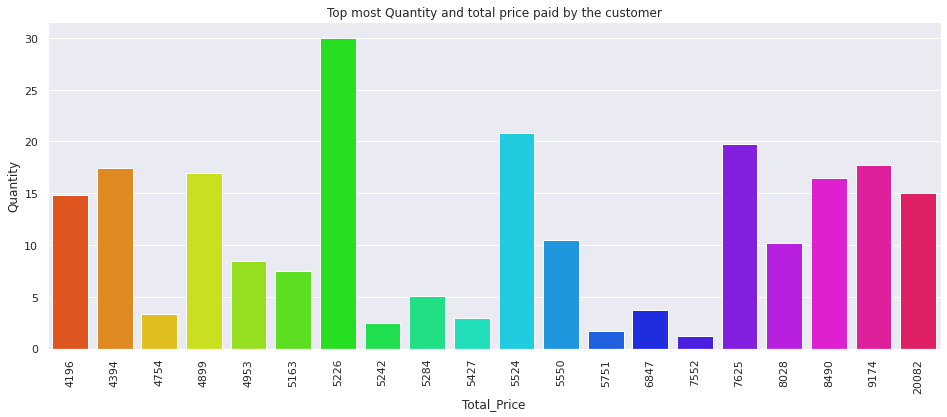

In [ ]:
# seaborn Bar plot Top most Quantity and total price paid by the customer:
plt.figure(figsize=(16,6))
sns.barplot(data=max_price, x="Total_Price",y="Quantity",palette = ('hsv'))
plt.xticks(rotation=90)
plt.fontsize=12
plt.title('Top most Quantity and total price paid by the customer')

## **Country Analysis**


In [ ]:
# Analysing Transactions each Country:
Countries_data = Retail_Data['Country'].value_counts().reset_index()
Countries_data.rename(columns = {'index' : 'Country_Name'}, inplace = True)
Countries_data.rename(columns = {'Country' : 'Count'}, inplace = True)

# Getting 5 Highest transactions Countries:
Countries_data.head()

,Country_Name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


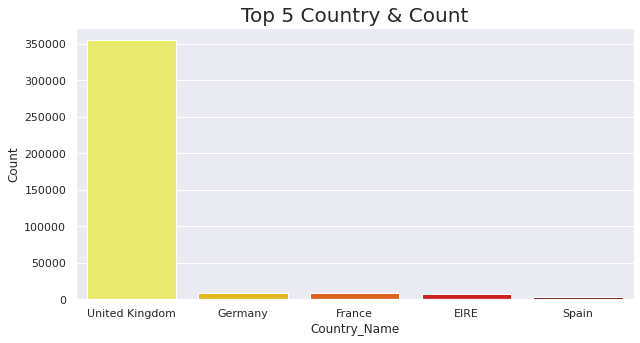

In [ ]:
# Plotting the top 5 countries:
plt.figure(figsize=(10,5))
plt.title('Top 5 Country & Count',fontsize=20)
sns.barplot(x='Country_Name',y='Count',data=Countries_data[:5], palette='hot_r')

From the above graph, it is clear that the United Kingdom has more transactions than other nations, indicating that it has a larger likelihood of making a purchase than Germany, France, Ireland, and Spain.

In [ ]:
# Getting 5 Lowest transactions Countries:
Countries_data.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


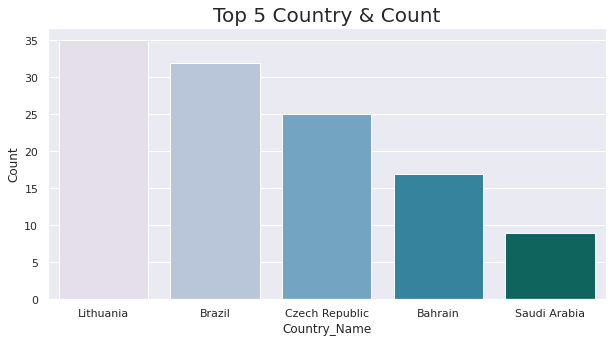

In [ ]:
# Plotting the Lowest 5 countries
plt.figure(figsize=(10,5))
plt.title('Top 5 Country & Count',fontsize=20)
sns.barplot(x='Country_Name',y='Count',data=Countries_data[-5:], palette='PuBuGn')

The Saudi Arabia has the lowest purchasing history, so we won't concentrate more on these five nations while analyzing the consumer.

## **Stock Analysis**

In [ ]:
# Getting StockCodes_Name with highest selling:
StockCode_Df=Retail_Data['StockCode'].value_counts().reset_index()
StockCode_Df.rename(columns={'index': 'StockCode_Names'}, inplace=True)
StockCode_Df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_Df.head(10)

,StockCode_Names,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397
5,20725,1317
6,22720,1159
7,20727,1105
8,POST,1099
9,23203,1098


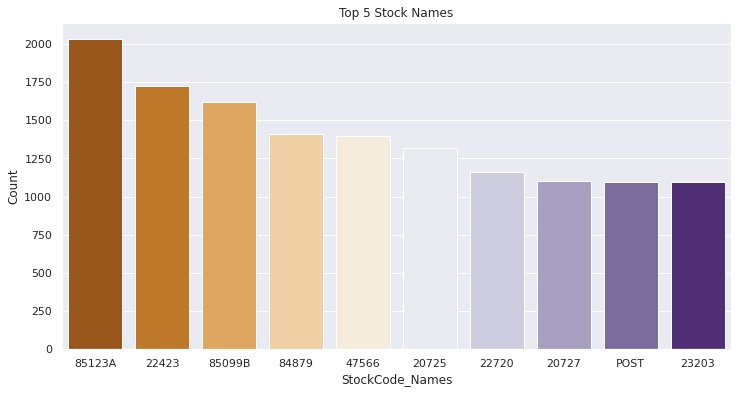

In [ ]:
# Plotting StockCodes_Name with highest selling:
plt.figure(figsize=(12,6))
plt.title('Top 5 Stock Names')
sns.barplot(x='StockCode_Names',y='Count',data=StockCode_Df[:10], palette='PuOr')

Top 10 Stock name based on selling

<br>

# **Feature Engineering**

## **Create a new features Day from Invoicedate**

In [ ]:
# Convert InvoiceDate columns into date time format:
Retail_Data['InvoiceDate'] = pd.to_datetime(Retail_Data['InvoiceDate'], infer_datetime_format=True)

In [ ]:
# Create different stats from the time stamps:
Retail_Data['Year'] = Retail_Data['InvoiceDate'].dt.year
Retail_Data['Month'] = Retail_Data['InvoiceDate'].dt.month
Retail_Data['Month_Name'] = Retail_Data['InvoiceDate'].dt.month_name()
Retail_Data['Day'] = Retail_Data['InvoiceDate'].dt.day
Retail_Data['Day_Name'] = Retail_Data['InvoiceDate'].dt.day_name()
Retail_Data['Hours'] = Retail_Data['InvoiceDate'].dt.hour
Retail_Data['Minutes'] = Retail_Data['InvoiceDate'].dt.minute

## **Per Day Transaction**

In [ ]:
# Finding Per Day Transaction
day = Retail_Data['Day_Name'].value_counts().reset_index()
day.rename(columns = {'index' : 'Day'}, inplace = True)
day.rename(columns = {'Day_Name' : 'Count'}, inplace = True)
day

,Day,Count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


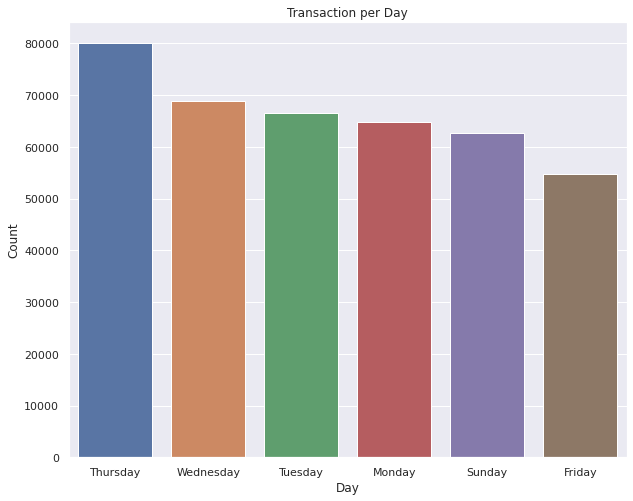

In [ ]:
# Bar Plot Per Day Transaction:
plt.figure(figsize=(10,8))
plt.title('Transaction per Day')
sns.barplot(x='Day',y='Count',data=day)

From the above graph, it is clear that Thursday has higher transaction volume than the other days, possibly because clients are more available, and Friday has lower transaction volume.

## **Purchasing Stats**

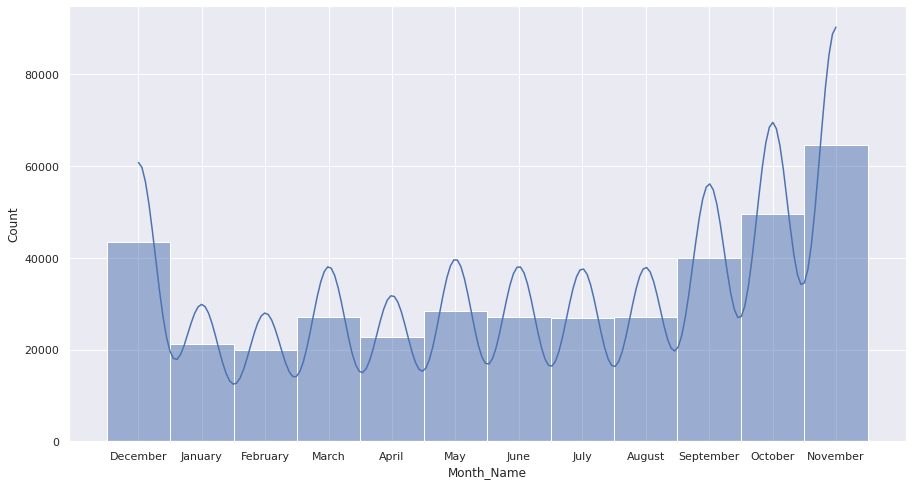

In [ ]:
# Plot of Purchasing stats per month:
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data= Retail_Data, x="Month_Name", kde= True,ax=ax)
plt.show()

The above graph makes it clearly transparent that buyers are purchasing winter clothing and possibly even Diwali decorations in November, which is winter season.

Given that customers make fewer purchases in January and February and that the winter season is coming to an end, it is obvious that customers make more purchases during the winter.

In [ ]:
Month = Retail_Data['Month_Name'].value_counts().reset_index()
Month.rename(columns = {'index' : 'Months'}, inplace = True)
Month.rename(columns = {'Month_Name' : 'Count'}, inplace = True)
Month

,Months,Count
0,November,64545
1,October,49557
2,December,43464
3,September,40030
4,May,28322
5,June,27185
6,March,27177
7,August,27013
8,July,26827
9,April,22644


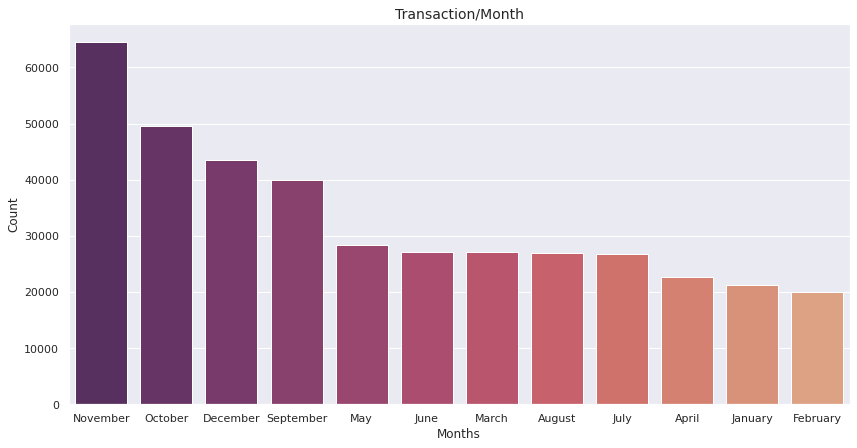

In [ ]:
# Bar Plot Transacton per Month:
plt.figure(figsize=(14,7))
plt.title('Transaction/Month', fontsize=14)
sns.barplot(x='Months',y='Count',data = Month, palette='flare_r')

## **Transaction Per Hours**

In [ ]:
# Finding Transaction Per Hours:
Hours = Retail_Data['Hours'].value_counts().reset_index()
Hours.rename(columns = {'index' : 'Hour'}, inplace = True)
Hours.rename(columns = {'Hours' : 'Count'}, inplace = True)
Hours

,Hour,Count
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


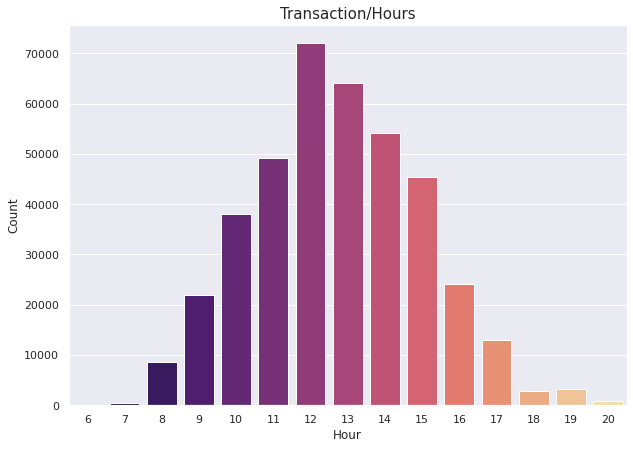

In [ ]:
# Plotting Bar Plot Transaction Per Hours:
plt.figure(figsize=(10,7))
plt.title('Transaction/Hours',fontsize= 15)
sns.barplot(x='Hour',y='Count',data= Hours, palette='magma')

According to hour, people do most of their shopping between the hours of 11 and 4, therefore practically all of them are free at this time.

In [ ]:
# Lets distribute the day in Morining, Afternoon and Evening
def time_type(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
Retail_Data['Time_type']=Retail_Data['Hours'].apply(time_type)

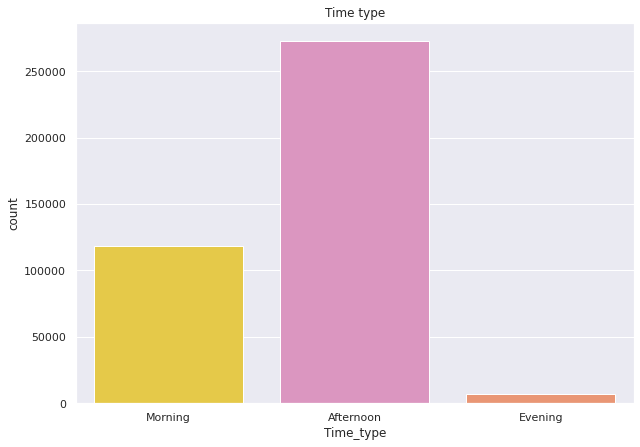

In [ ]:
# Plot distribute the day in Morning Afternoon and Evening
plt.figure(figsize=(10,7))
plt.title('Time type')
sns.countplot(x='Time_type',data=Retail_Data, palette='Set2_r')

Most customers purchase things in the afternoon, followed by modest numbers of customers in the morning, and the smallest numbers of customers in the evening.

In [ ]:
Retail_Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Year,Month,Month_Name,Day,Day_Name,Hours,Minutes,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,December,1,Wednesday,8,26,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December,1,Wednesday,8,26,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,December,1,Wednesday,8,26,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December,1,Wednesday,8,26,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December,1,Wednesday,8,26,Morning


## **Correlation matrix**

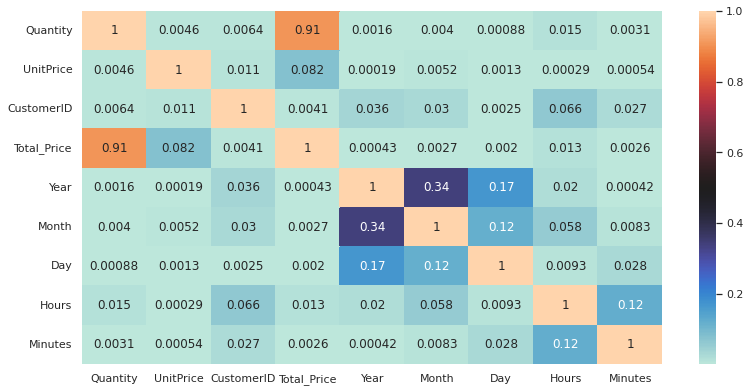

In [ ]:
# Plotting heatmap to show correlation of different variables
plt.figure(figsize=(13,6.5))
correlation = Retail_Data.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "icefire")

## **Analyzing all Numerical Features**

In [ ]:
# Assigning numerical columns to variables:
numerical_columns = list(Retail_Data.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID', 'Total_Price', 'Year', 'Month',
       'Day', 'Hours', 'Minutes'],
      dtype='object')

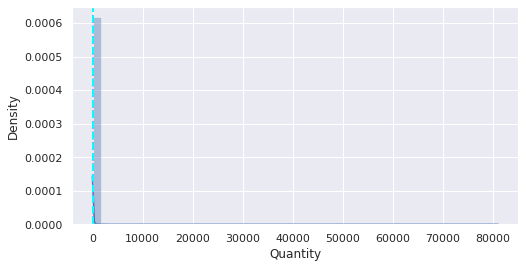

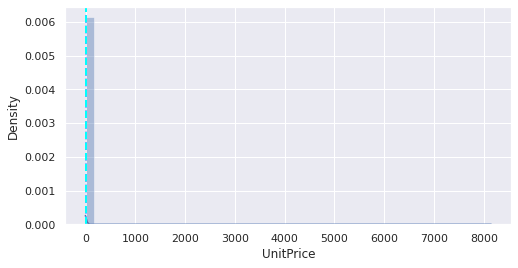

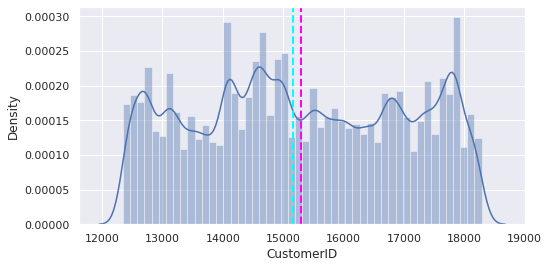

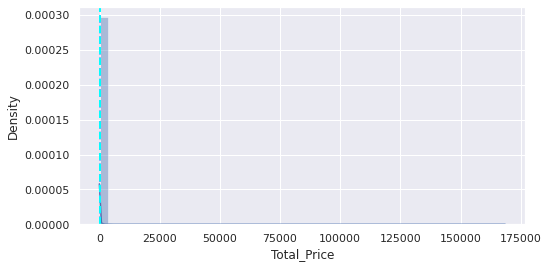

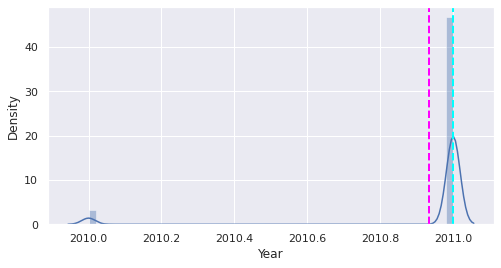

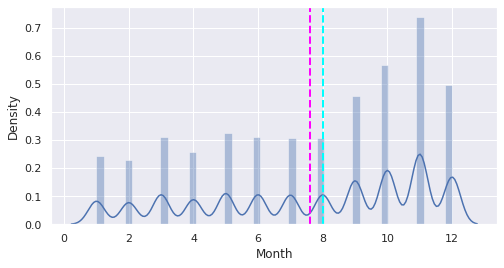

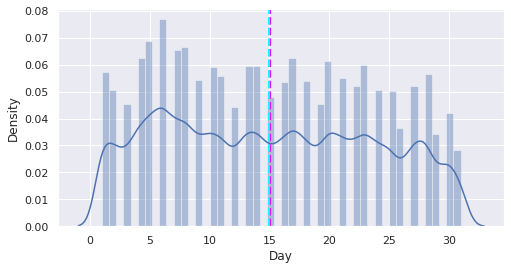

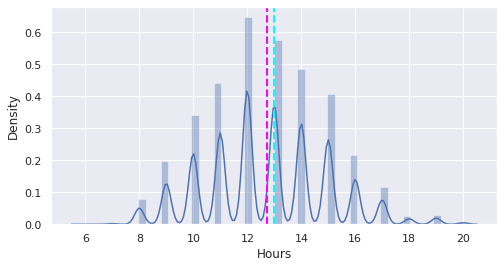

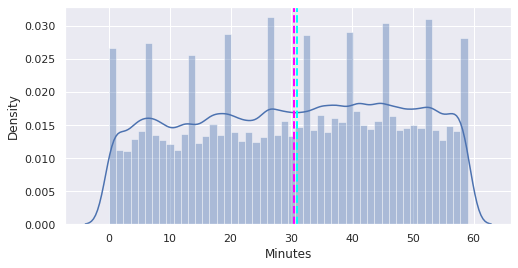

In [ ]:
# Analysing distribution of all numerical variables:
for col in numerical_features:
    fig = plt.figure(figsize=(8, 4))
    ax = fig.gca()
    feature = Retail_Data[col]
    sns.distplot(x=Retail_Data[col])
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.xlabel(col)
plt.show()

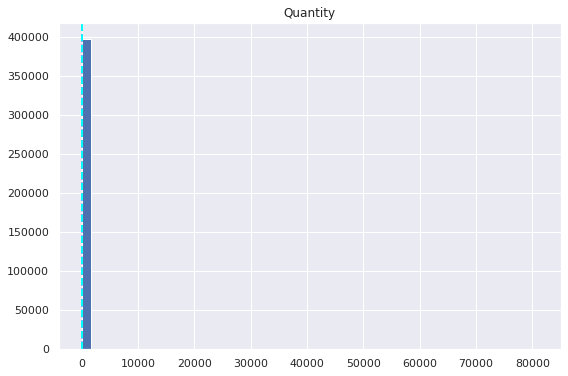

Skewness : 403.31943081039486
Kurtosis : 173965.71516660746


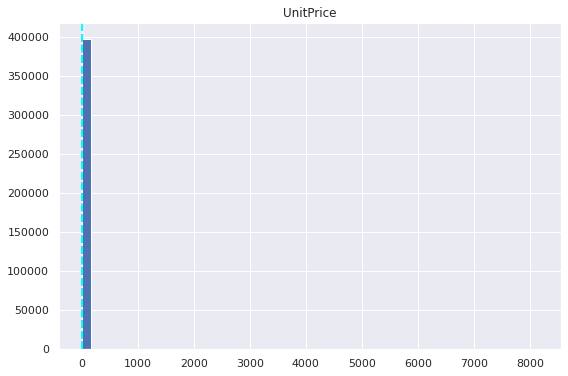

Skewness : 204.04241268899307
Kurtosis : 58146.02091050399


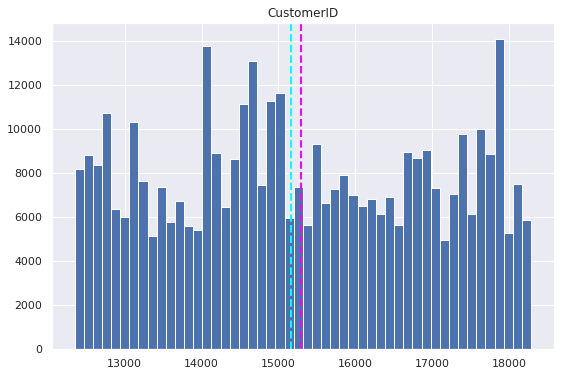

Skewness : 0.02577629847429845
Kurtosis : -1.1808302151571712


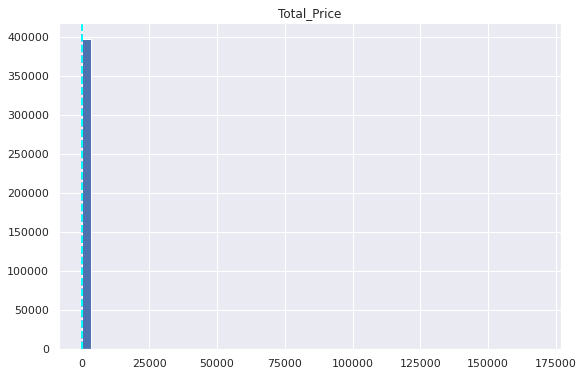

Skewness : 451.465537635017
Kurtosis : 232178.22423598208


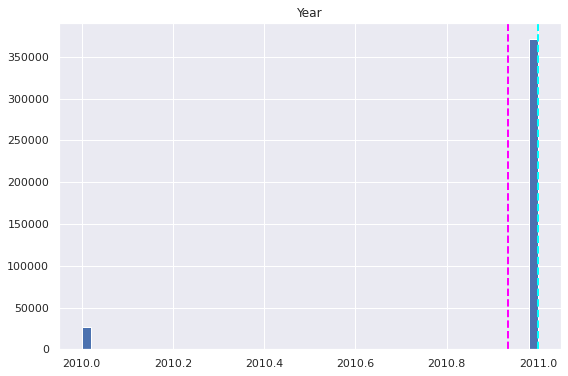

Skewness : -3.5045145019499735
Kurtosis : 10.281673570919017


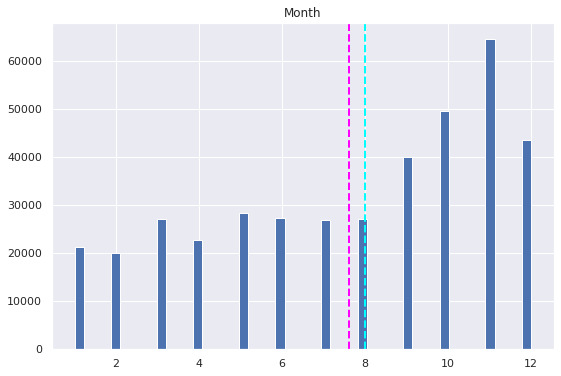

Skewness : -0.4448423572483675
Kurtosis : -1.074460364777609


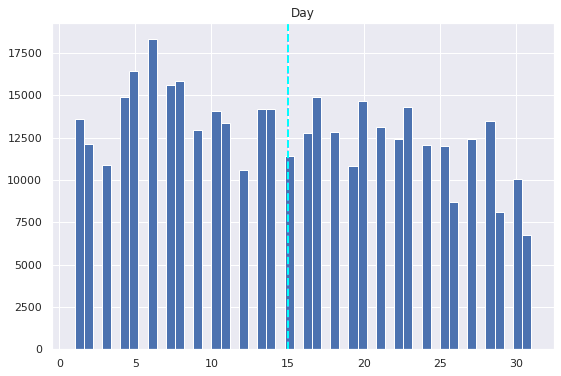

Skewness : 0.1144792789730314
Kurtosis : -1.1728727400772625


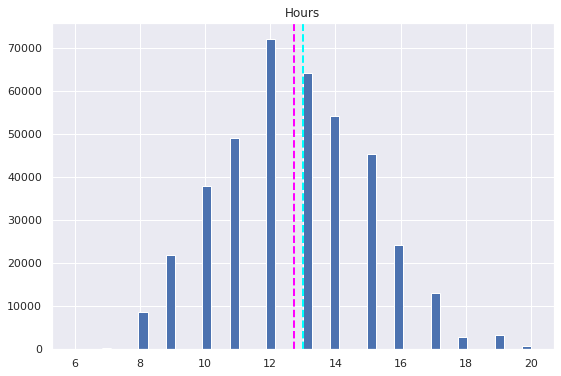

Skewness : 0.18903743045332783
Kurtosis : -0.20968488890482462


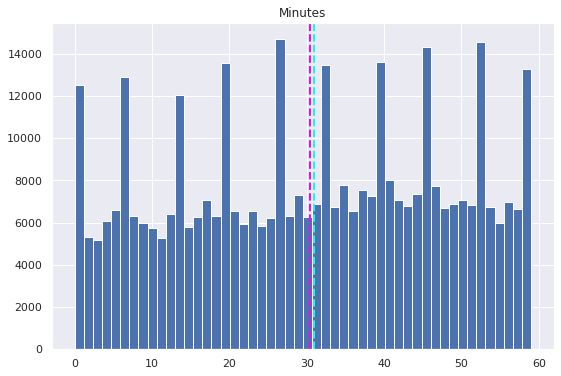

Skewness : -0.08092206133583811
Kurtosis : -1.1655389341755757


In [ ]:
# Analyse all numerical feature using histogram
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (Retail_Data[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",Retail_Data[col].skew())
  print( "Kurtosis :",Retail_Data[col].kurt())

<br>

# **Recency, Frequency, Monetary (RFM) Model**

It is always required to establish several quantitative factors on which the algorithm will execute segmentation prior to using any clustering techniques. These include characteristics like the total amount spent, the customer's activity level, their most recent visit, etc.

* One of the steps is the RFM model, which stands for Recency, Frequency, and Monetary. For each customer, we calculate the recency—the number of days since the customer's last visit—the frequency—how frequently they make repeat purchases—and the monetary—their overall spending. 

* There are other processes where we break each of these attributes into the appropriate groups and figure out a score for each client. However, since segmentation may be done manually, this strategy does not need machine learning algorithms. As a result, we will skip the second stage and use the rfm characteristics directly as input for clustering algorithms.

* **Recency :-** Latest Date - Last Inovice Data

* **Frequency :-**Count of Invoice No. of transactions

* **Monetary:-** Sum of Total Amount for each customer

## **Performing RFM Segmentation and RFM Analysis**

In [ ]:
import datetime as dt
PRESENT = dt.datetime(2011,12,10)
rfm_model= Retail_Data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Total_Price': lambda price: price.sum()})
# Convert Invoice Date into type int
rfm_model['InvoiceDate'] = rfm_model['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency and Monetary
rfm_model.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Total_Price': 'Monetary'}, inplace=True)

rfm_model.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
# Descriptive Staistics:
rfm_model.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

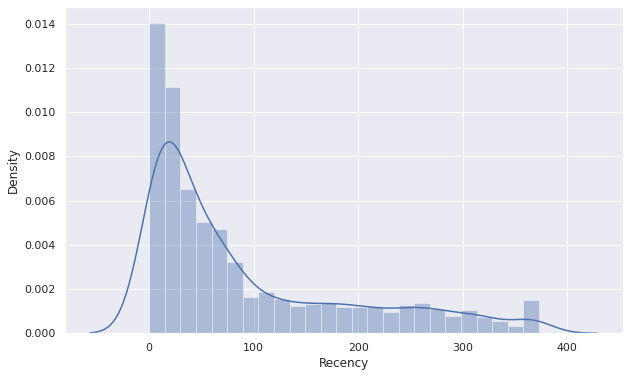

In [ ]:
# Recency Distribution Plot
rfm_plot = rfm_model['Recency']
plt.figure(figsize=(10,6))
sns.distplot(rfm_plot)

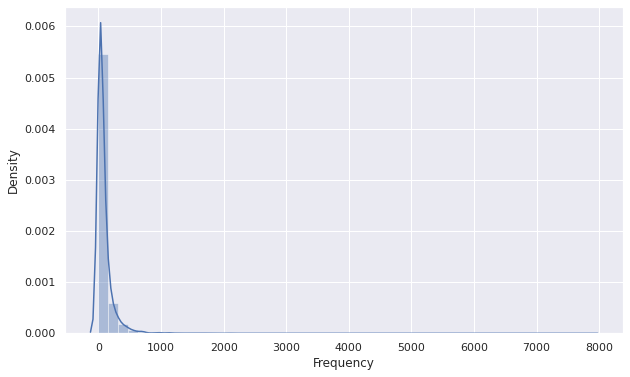

In [ ]:
# Desriptive Statistics (Frequency):
rfm_plot = rfm_model['Frequency']
plt.figure(figsize=(10,6))
sns.distplot(rfm_plot)

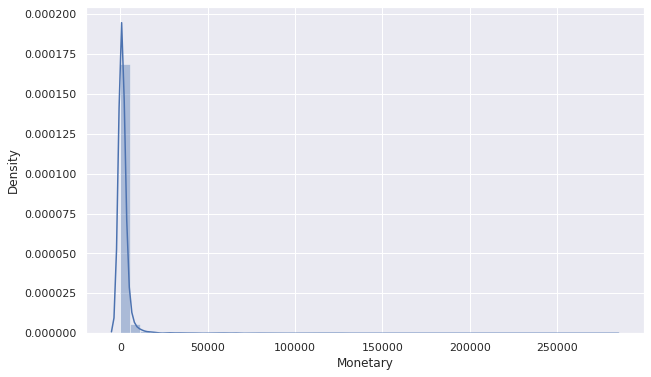

In [ ]:
# Descriptive Staistics (Monetary)
rfm_plot = rfm_model['Monetary']
plt.figure(figsize=(10,6))
sns.distplot(rfm_plot)

## **Computing Quantile of RFM values**

Customers are categorized as top customers based on their frequency, amount spent, and recency.

qcut() is a discretization function based on quantiles. Data is binned by qcut using sample quantiles. For instance, a categorical object representing quantile membership for each client would be produced from 1000 values for 4 quantiles.

In [ ]:
# Calculate & Add R, F and M segment value columns in the existing dataset to show R, F and M segment values:
rfm_model['R_quantile'] = pd.qcut(rfm_model['Recency'], 4, ['1','2','3','4'])
rfm_model['F_quantile'] = pd.qcut(rfm_model['Frequency'], 4, ['4','3','2','1'])
rfm_model['M_quantile'] = pd.qcut(rfm_model['Monetary'], 4, ['4','3','2','1'])
rfm_model.head()

,Recency,Frequency,Monetary,R_quantile,F_quantile,M_quantile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


## **RFM Interpretation result**

In [ ]:
#Calculate and Add column showing total sum of RFMGroup values:
rfm_model['RFM_Score'] = rfm_model.R_quantile.astype(str)+ rfm_model.F_quantile.astype(str) + rfm_model.M_quantile.astype(str)
rfm_model.head()

,Recency,Frequency,Monetary,R_quantile,F_quantile,M_quantile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12347.0,2,182,4310.00,1,1,1,111
12348.0,75,31,1797.24,3,3,1,331
12349.0,18,73,1757.55,2,2,1,221
12350.0,310,17,334.40,4,4,3,443


## **Log Transformation**

In [ ]:
# In order to manage infinite numbers during log transformation, handle negative and zero values:
def handle_neg_zero(x):
    if x <= 0:
        return 1
    else:
        return x
# Apply the function (handle neg zero) to the Recency and Monetary columns: 
rfm_model['Recency'] = [handle_neg_zero(x) for x in rfm_model.Recency]
rfm_model['Monetary'] = [handle_neg_zero(x) for x in rfm_model.Monetary]

# Perform Log transformation to get data into a normal or nearly normal distribution:
Log_Trans_Dist_Data = rfm_model[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

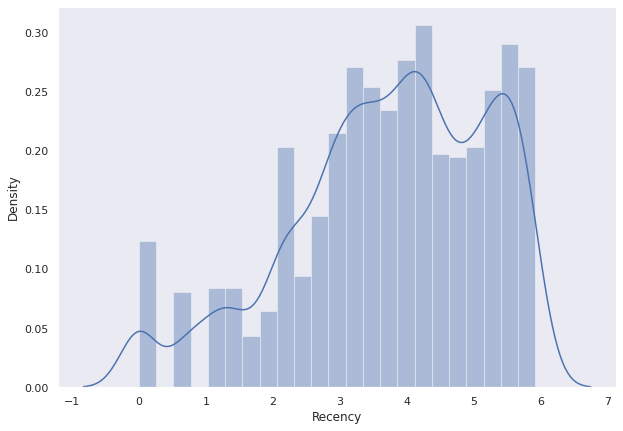

In [ ]:
# After normalization for Recency, the distribution of data is as follows:
Recency_Plot = Log_Trans_Dist_Data['Recency']
plt.figure(figsize=(10,7))
sns.distplot(Recency_Plot)
plt.grid()

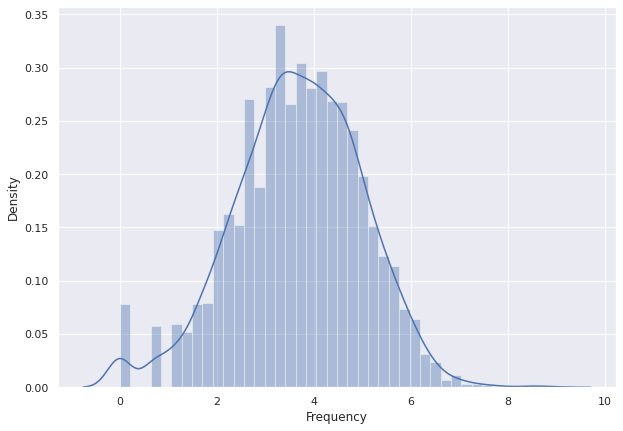

In [ ]:
# After normalization for Frequency, the distribution of data is as follows:
Frequency_Plot = Log_Trans_Dist_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,7))
sns.distplot(Frequency_Plot)

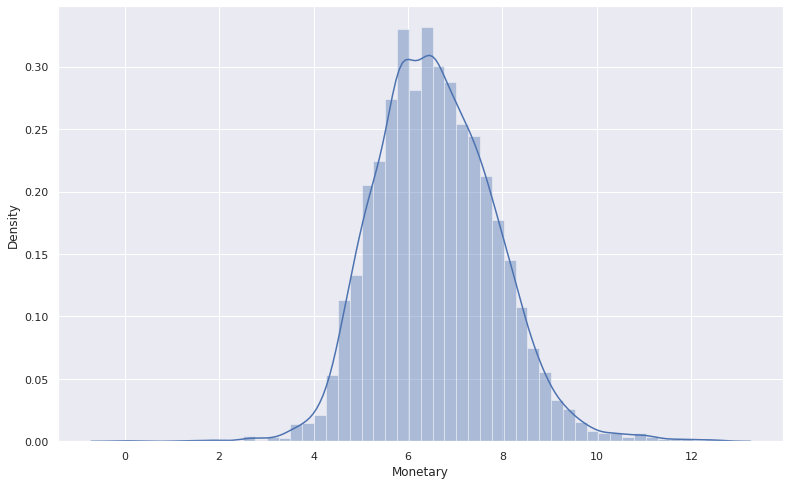

In [ ]:
# After normalization for Monetary, the distribution of data is as follows:
Monetary_Plot = Log_Trans_Dist_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

# **K- Means Clustring Implementation**
* It can be summarized as the process of finding data subgroups where data points in the same subgroup (cluster) are extremely similar and other data points in other clusters are very different.

## **Finding Optimal Number of Clusters**

There are two primary methods to define number of clusters:
  * Silhouette Score (math method)
      * Measures intra- and inter-cluster distance
      
  * Elbow criterion (visual method)
     * Plot number of clusters against within-cluster sum-of-squared-errors (SSE) - sum of squared distances from every data point to their cluster center

## **Calculation of Silhouette Score**

In [ ]:
# Creating variable
rfm_model['Recency_log'] = rfm_model['Recency'].apply(math.log)
rfm_model['Frequency_log'] = rfm_model['Frequency'].apply(math.log)
rfm_model['Monetary_log'] = rfm_model['Monetary'].apply(math.log)

## **Silhouette score method on Recency and Monetary**

In [ ]:
# Applying Silhouette score method on Recency and Monetary
features_rec_mon = ['Recency_log','Monetary_log']
X_features_rec_mon = rfm_model[features_rec_mon].values
# Fit the model
scaler_rec_mon = preprocessing.StandardScaler()
X_rec_mon = scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters)
  preds = clusterer.fit_predict(X)
  centers = clusterer.cluster_centers_
# Checking the silhouette score on clusters
  score = silhouette_score(X,preds)
  print(' For n_clusters = {}, silhouette sore is {}'.format (n_clusters, score))

 For n_clusters = 2, silhouette sore is 0.42096647717466357
 For n_clusters = 3, silhouette sore is 0.3430608184527577
 For n_clusters = 4, silhouette sore is 0.36431591478500835
 For n_clusters = 5, silhouette sore is 0.3401262629237664
 For n_clusters = 6, silhouette sore is 0.34349645790029015
 For n_clusters = 7, silhouette sore is 0.3424681104938937
 For n_clusters = 8, silhouette sore is 0.33717186315551134
 For n_clusters = 9, silhouette sore is 0.3449377656733416
 For n_clusters = 10, silhouette sore is 0.34800869969584486
 For n_clusters = 11, silhouette sore is 0.33805099910434905
 For n_clusters = 12, silhouette sore is 0.3430661353191348
 For n_clusters = 13, silhouette sore is 0.33933479417634393
 For n_clusters = 14, silhouette sore is 0.34475828866054914


## **Applying Elbow Method on Recency and Monetary**

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_model[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

sum_of_sq_dist = {}
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters= k)
    kmeans = kmeans.fit(X)
    sum_of_sq_dist[k] = kmeans.inertia_

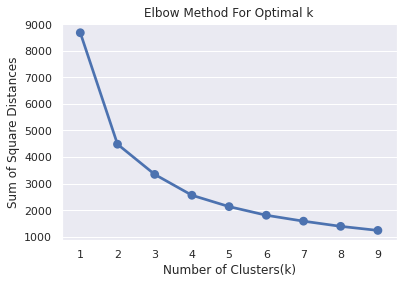

In [ ]:
# Plotting the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## **Hyperparameter Tuning For the Best Value of K**

In [ ]:
# Fit the Cluster and Predict the values:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

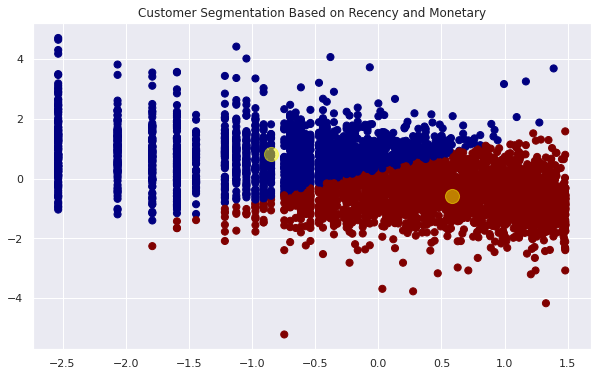

In [ ]:
# Plot customer segmentation by taking k=2
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='jet')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

When we separate customers by Recency and Monetary value, we can observe that they are well-separated.

## **Implementation of Density Based Spatial Clustering of Applications with Noise (DBSCAN)**

*   **Distance between nearest points.**

## **DBSCAN on Recency and Monetary**

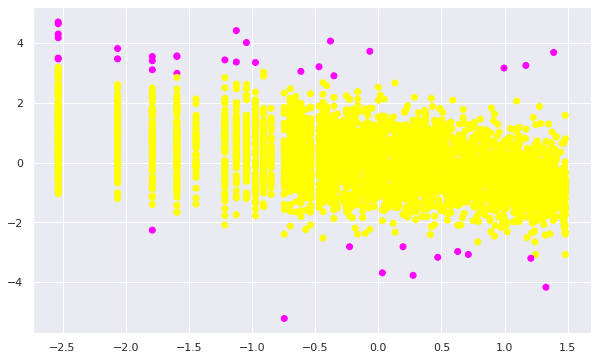

In [ ]:
# Applying DBSCAN on Recency and Monetary
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(10,6))

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='spring')

##**Silhouette score method on Frequency and Monetary**

In [ ]:
# Applying silhouette score method on Frequency and Monetary
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_model[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4782608772260966
For n_clusters = 3, silhouette score is 0.4074267531808067
For n_clusters = 4, silhouette score is 0.37172714433473125
For n_clusters = 5, silhouette score is 0.3438018664611139
For n_clusters = 6, silhouette score is 0.35968013778064417
For n_clusters = 7, silhouette score is 0.3385630688823618
For n_clusters = 8, silhouette score is 0.3533303318815764
For n_clusters = 9, silhouette score is 0.3462295705010296
For n_clusters = 10, silhouette score is 0.34368766835247655
For n_clusters = 11, silhouette score is 0.3673040361128039
For n_clusters = 12, silhouette score is 0.35393726205051923
For n_clusters = 13, silhouette score is 0.36133414280576015
For n_clusters = 14, silhouette score is 0.3694740460402445


In [ ]:
# Applying elbow method on Frequency and Monetary
sum_of_sq_dist = {}
for k in range (1,15):
  km = KMeans(n_clusters= k)
  km = km.fit(X)
  sum_of_sq_dist[k] = km.inertia_

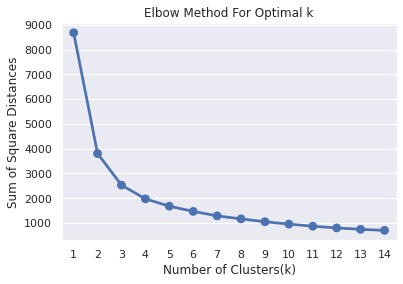

In [ ]:
# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## **Hyperparameter Tuning For Best Value of K**

In [ ]:
# Taking the number of clusters as 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

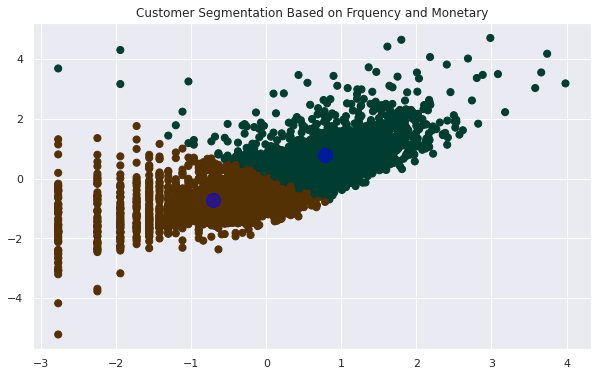

In [ ]:
# Plot customer segmentation based on Fequency and Monetary
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Frquency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='BrBG')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

<br>

## **DBSCAN on Frequency and Monetary**

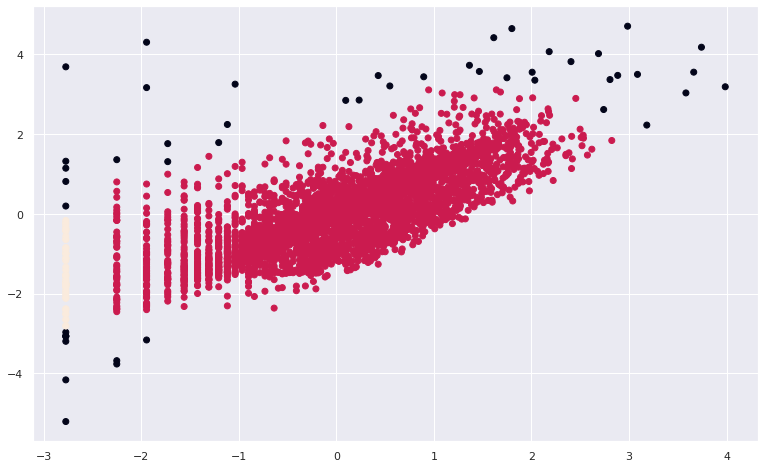

In [ ]:
# Applying DBSCAN method on Frequency and Monetary
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

# **Comparison between  R vs M and F vs M**

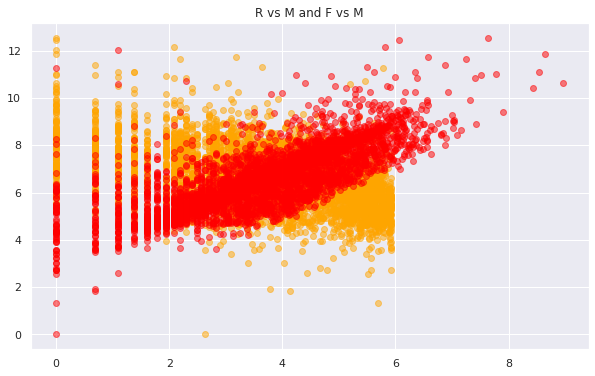

In [ ]:
# Plot R vs M and F vs M
plt.figure(figsize=(10,6))
plt.title('R vs M and F vs M')
plt.scatter(rfm_model.Recency_log,rfm_model.Monetary_log,alpha=0.5, color='orange')
plt.scatter(rfm_model.Frequency_log,rfm_model.Monetary_log,alpha=0.5, color='red')

<br>

# **Conclusion:**

* We performed consumer segmentation using a variety of steps throughout the analysis. Starting with data wrangling, we tried to deal with duplicates, null values, and feature updates. We then performed some exploratory data analysis in an effort to derive observations from the dataset's features.

* Then, for each of the consumers, we developed some quantitative components, such as recency, frequency, and monetary data, known as the rfm model. On these features, we applied the KMeans clustering algorithm. To determine the ideal number of clusters, which was 2, we also performed silhouette and elbow method analyses.

* Customers with low frequency and high value transactions were part of one cluster, while those with low frequency and high value transactions were part of another cluster.

* There may be other adjustments made to this analysis, though. Depending on the goals and preferences of the firm, one may decide to cluster into a greater number. After clustering, the tagged feature can be put into supervised machine learning algorithms for classification that can forecast the classes for fresh sets of observations.

* The clustering can also be done on a new set of features, such segmenting customers based on the times of their visits, determining customer lifetime value (CLV), and many more.